## Predict House Price Model

### import the module need to use

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mat
import warnings

print("pandas:",pd.__version__)
print("numpy:",np.__version__)
print("matplotlib:",mat.__version__)
print("seaborn:",sns.__version__)
print("sklearn:",sklearn.__version__)

pandas: 1.4.2
numpy: 1.21.5
matplotlib: 3.5.1
seaborn: 0.11.2
sklearn: 1.0.2


### use pandas to read the Boston House Price Dataset

In [2]:
# CRIM: per capita crime rate by town
# ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS: proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: nitric oxides concentration (parts per 10 million)
# RM: average number of rooms per dwelling
# AGE: proportion of owner-occupied units built prior to 1940
# DIS: weighted distances to ﬁve Boston employment centers
# RAD: index of accessibility to radial highways
# TAX: full-value property-tax rate per $10,000
# PTRATIO: pupil-teacher ratio by town
# B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
# LSTAT: % lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

dfbo = pd.read_csv("boston_house_prices.csv",engine = 'python',header = 1,encoding = 'utf8')
# Data columns info，From top to bottom: count，mean，std，min，25%，50%，75%，max
print(dfbo.describe().applymap(lambda x:round(x,1)))  

# print(dfbo.head()) 
dfbo.head()

        CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
count  506.0  506.0  506.0  506.0  506.0  506.0  506.0  506.0  506.0  506.0   
mean     3.6   11.4   11.1    0.1    0.6    6.3   68.6    3.8    9.5  408.2   
std      8.6   23.3    6.9    0.3    0.1    0.7   28.1    2.1    8.7  168.5   
min      0.0    0.0    0.5    0.0    0.4    3.6    2.9    1.1    1.0  187.0   
25%      0.1    0.0    5.2    0.0    0.4    5.9   45.0    2.1    4.0  279.0   
50%      0.3    0.0    9.7    0.0    0.5    6.2   77.5    3.2    5.0  330.0   
75%      3.7   12.5   18.1    0.0    0.6    6.6   94.1    5.2   24.0  666.0   
max     89.0  100.0   27.7    1.0    0.9    8.8  100.0   12.1   24.0  711.0   

       PTRATIO      B  LSTAT   MEDV  
count    506.0  506.0  506.0  506.0  
mean      18.5  356.7   12.7   22.5  
std        2.2   91.3    7.1    9.2  
min       12.6    0.3    1.7    5.0  
25%       17.4  375.4    6.9   17.0  
50%       19.1  391.4   11.4   21.2  
75%       20.2  396.2 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### visualize dataset, draw the scatter plot of MEDV of each field and the result field to check the relationship between the data

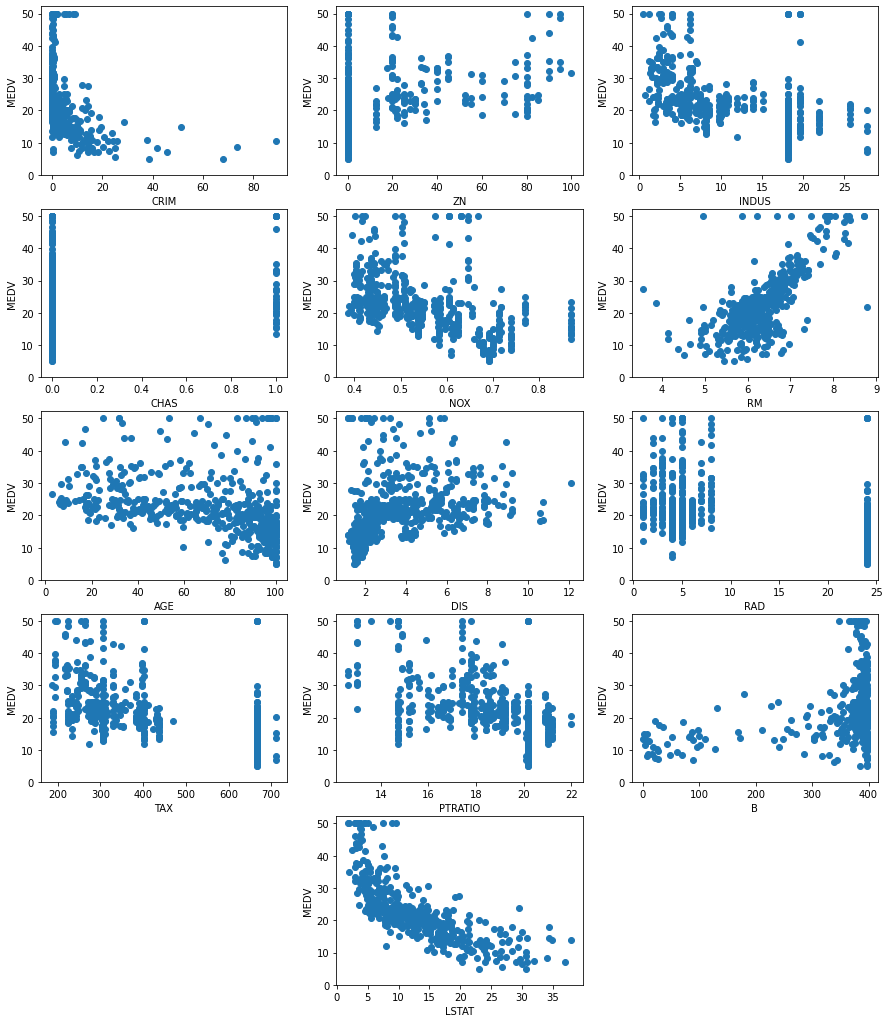

In [3]:
def drawing(x,y,xlabel):
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel('MEDV')
    plt.yticks(range(0,60,10))
    
plt.figure(figsize = (15,18))
plot_count = 1
for f in dfbo.columns.tolist()[:-1]:
    if plot_count == 13:
        plot_count += 1
    plt.subplot(5,3,plot_count)
    drawing(dfbo[f],dfbo['MEDV'],f)
    plot_count += 1

# save the image to local
plt.savefig('dataset_scatter.png',dpi = 72,bbox_inches = 'tight',facecolor = 'w',edgecolor = 'b')  

# display the chart, you can see that most of the fields have absolutely nothing to do with MEDV
plt.show()  

### draw the heatmap between fields to view the correlation

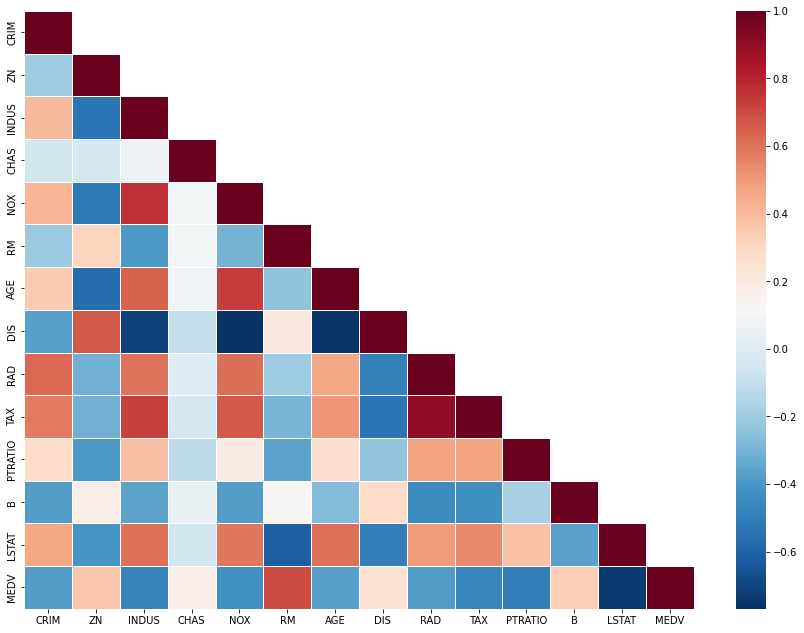

In [4]:
# The deeper the red, the stronger the positive correlation
# The deeper the blue, the stronger the negative correlation
# Light colors indicate no correlation

corr = dfbo.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize = (15,11))
colors = sns.color_palette(palette="RdBu_r",n_colors=200)
sns.heatmap(corr,mask = mask,linewidths = 0.5,xticklabels=1,yticklabels=1,cmap = colors)

# save the image to local
plt.savefig('dataset_heatmap.png',dpi = 72,bbox_inches = 'tight',facecolor = 'w',edgecolor = 'b')  

### chose three factors with the max correlation with MEDV, whatever it's positive or negative

In [5]:
print(", ".join(corr.abs().nlargest(4,'MEDV').index.tolist()))

MEDV, LSTAT, RM, PTRATIO


### import sklearn, divide dataset into training set and test set

In [6]:
from sklearn.model_selection import train_test_split 

X = dfbo[['LSTAT','RM','PTRATIO']]
Y = dfbo['MEDV']
x_train,x_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 5)
print(f"x_train shape:{x_train.shape}")
print(f"Y_train shape:{Y_train.shape}")
print(f"x_test shape:{x_test.shape}")
print(f"Y_test shape:{Y_test.shape}")

x_train shape:(404, 3)
Y_train shape:(404,)
x_test shape:(102, 3)
Y_test shape:(102,)


### training linear regression model, obtain the prediction formula and the model score

coefficient of influence factor: [-0.64697098  3.9169303  -0.95483295]
model score:0.69
linear predict formula is : MEDV = 23.681070268714844-0.6469709844659466*LSTAT +3.916930303793618*RM -0.9548329454328635*PTRATIO


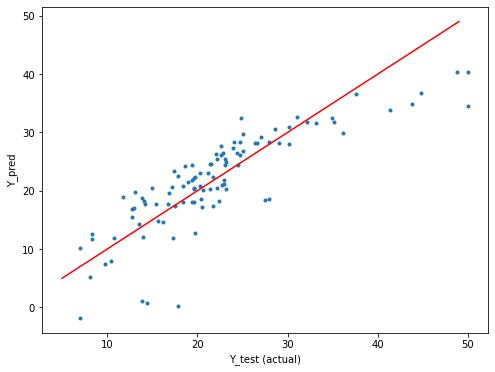

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a new linear regression model object
reg = LinearRegression()    

# training
reg.fit(x_train,Y_train)    

# test the model and predict the data
Y_pred = reg.predict(x_test)    
print("coefficient of influence factor:",reg.coef_)
print("model score:%.2f"%r2_score(Y_test,Y_pred))

# obtain linear prediction formula of the model
s = ' '.join([f"+{j}*{i}" if j > 0 else f"{j}*{i}" for i,j in zip(x_train.columns,reg.coef_)])
print(f"linear predict formula is : MEDV = {reg.intercept_}{s}")    

# compare actual results and predicted results visually
plt.figure(figsize = (8,6))
plt.plot(Y_test,Y_pred,linestyle = '',marker = '.')
plt.plot([i for i in range(5,50)],[i for i in range(5,50)],color = 'red')
plt.xlabel('Y_test (actual)')
plt.ylabel('Y_pred')
plt.savefig('prediction_scatter.png',dpi = 72,bbox_inches = 'tight',facecolor = 'w',edgecolor = 'b')  
plt.show()

### save the model to local

In [8]:
import sklearn.externals
import joblib
joblib.dump(reg,"BostonHousePriceLinearModel.skln")

['BostonHousePriceLinearModel.skln']

### reload the model, input the parameters, and get an estimated house price

In [10]:
warnings.simplefilter('ignore')
reg2 = joblib.load("BostonHousePriceLinearModel.skln")
reg2.predict([[ 6.58, 7.691, 18.6 ]])[0]

31.78921937235437

### input parameters to get an estimated house price 

In [11]:
# Here we used 3 groups of datasets to input to the model for the test
#     RM,   LSTAT, PTRATIO
# [[ 7.691, 6.58, 18.6 ],
# [ 6.726, 8.05, 17.4 ],
# [ 6.538, 7.73, 18.6 ]]
warnings.simplefilter('ignore')
while True:
    print("Start evaluating the price of your room")
    rm = input("Please enter the average number of rooms in the house(RM):")
    if rm == '0':
        bflag = input("Exit the house price estimate?(y/n):")
        if bflag == 'y':
            break
    lstat = eval(input("Please enter percentage lower status of the population(LSTAT):"))
    ptra = eval(input("Please enter pupil-teacher ratio by town(PTRATIO):"))
    
    # estimate house price
    medv = reg2.predict([[lstat,eval(rm),ptra]])[0]
    print(f"Your house price is(MEDV):{medv}")
    bflag = input("continue predict? (y/n):")
    if bflag == 'n':
        break

Start evaluating the price of your room
Please enter the average number of rooms in the house(RM):7.691
Please enter percentage lower status of the population(LSTAT):6.58
Please enter pupil-teacher ratio by town(PTRATIO):18.6
Your house price is(MEDV):31.78921937235437
continue predict? (y/n):y
Start evaluating the price of your room
Please enter the average number of rooms in the house(RM):6.726
Please enter percentage lower status of the population(LSTAT):8.05
Please enter pupil-teacher ratio by town(PTRATIO):17.4
Your house price is(MEDV):28.204133816548026
continue predict? (y/n):y
Start evaluating the price of your room
Please enter the average number of rooms in the house(RM):6.358
Please enter percentage lower status of the population(LSTAT):7.73
Please enter pupil-teacher ratio by town(PTRATIO):18.6
Your house price is(MEDV):25.823934645261637
continue predict? (y/n):n
